### Assignment 1 Solution

In [2]:
# Import modules
import pandas as pd
import numpy as np

#### Question 1

In [3]:
# import monthly data
monthly = pd.read_csv('./monthly.csv',header=None)
date = monthly.iloc[:,0]
monthly = monthly.drop(0,axis=1)
# Specify the names of the columns
monthly.columns = ['VW','EW']+['DEC{}'.format(i) for i in range(1, 11)]

In [4]:
# defining a function to perform repeating calculations in one line 

# FUNCTION:     custom_stats
# INPUT:        1. dataframe = a pandas dataframe object where all columns are integer or float values only
# OUTPUT:       1. dataframe = a pandas dataframe object that contains summary statistics of each column 
#                              from the input df 
# DEPENDENCIES: N/A

def custom_stats(dataframe):
    
    T = len(dataframe.index)
    # Basic Statistics: average, s.d., percentiles
    basicstats = dataframe.describe().transpose()
    basicstats = basicstats.drop(['min','max'], axis=1) # remove min and max columns
    basicstats = basicstats.apply(lambda x: x*100 if x.name!='count' else x)
    
    skew = dataframe.skew().rename('skew')
    zstat1 = (skew/np.sqrt(6/T)).rename('$z_1$')
    kurt = dataframe.kurtosis().rename('kurtosis')
    zstat2 = (kurt/np.sqrt(24/T)).rename('$z_2$')

    # combining all calculations into one dataframe
    summ_stat = pd.concat([basicstats, skew, zstat1, kurt, zstat2], axis=1)
    summ_stat['count'] = summ_stat['count'].astype(int)
    pd.options.display.float_format = '{:.3f}'.format
    
    return summ_stat

#### parts (a) & (b) 

In [5]:
# Compute the descriptive statistics for each of the 12 portfolios
custom_stats(monthly)

,count,mean,std,25%,50%,75%,skew,$z_1$,kurtosis,$z_2$
VW,1164,0.919,5.343,-1.831,1.287,3.932,0.129,1.797,7.585,52.823
EW,1164,1.201,7.165,-2.047,1.415,4.325,1.443,20.105,14.940,104.045
DEC1,1164,1.679,10.306,-2.975,0.932,5.334,2.935,40.879,24.498,170.609
DEC2,1164,1.289,8.813,-2.625,1.112,4.616,1.996,27.801,18.635,129.780
DEC3,1164,1.135,7.919,-2.268,1.081,4.562,1.912,26.635,21.254,148.015
DEC4,1164,1.088,7.460,-2.460,1.269,4.575,1.103,15.358,11.980,83.432
DEC5,1164,1.101,7.188,-2.266,1.249,4.521,0.864,12.036,11.004,76.637
DEC6,1164,1.081,6.974,-2.255,1.420,4.601,0.615,8.563,8.967,62.449
DEC7,1164,1.073,6.679,-2.254,1.418,4.579,0.423,5.887,7.897,54.993
DEC8,1164,0.992,6.299,-2.199,1.372,4.397,0.262,3.651,7.955,55.398


#### part (c)

##### Portfolio Returns for January

In [6]:
# filtering out january
jan_only = monthly.iloc[::12]
custom_stats(jan_only)

,count,mean,std,25%,50%,75%,skew,$z_1$,kurtosis,$z_2$
VW,97,1.432,4.749,-2.621,1.262,4.960,0.279,1.122,-0.072,-0.145
EW,97,5.152,7.130,0.542,4.029,8.897,1.055,4.243,2.224,4.471
DEC1,97,12.365,12.598,4.144,8.752,15.790,1.586,6.379,3.388,6.811
DEC2,97,8.294,9.351,2.237,6.305,11.667,1.255,5.046,2.422,4.869
DEC3,97,6.675,8.320,1.532,5.649,10.050,1.415,5.688,3.778,7.595
DEC4,97,5.500,7.899,0.647,4.181,8.767,1.298,5.220,3.204,6.441
DEC5,97,4.541,7.109,-0.163,3.929,7.986,1.018,4.092,2.174,4.371
DEC6,97,3.949,7.123,-0.770,3.770,8.506,0.934,3.756,2.115,4.251
DEC7,97,3.103,6.613,-1.061,2.205,7.472,1.006,4.044,2.464,4.954
DEC8,97,2.393,5.939,-1.863,1.764,6.441,0.651,2.620,1.352,2.718


##### Portfolio Returns for February-December

In [7]:
# filtering out the rest of the year
feb2dec = monthly[monthly.index%12!=0]
custom_stats(feb2dec)

,count,mean,std,25%,50%,75%,skew,$z_1$,kurtosis,$z_2$
VW,1067,0.872,5.393,-1.821,1.296,3.830,0.126,1.680,7.967,53.121
EW,1067,0.842,7.063,-2.262,1.203,4.115,1.531,20.420,17.171,114.490
DEC1,1067,0.708,9.499,-3.476,0.532,4.247,3.405,45.408,35.372,235.851
DEC2,1067,0.653,8.484,-3.017,0.838,4.074,2.195,29.277,23.439,156.287
DEC3,1067,0.631,7.690,-2.575,0.818,4.072,2.055,27.405,25.671,171.164
DEC4,1067,0.687,7.291,-2.668,1.020,4.187,1.096,14.613,13.803,92.036
DEC5,1067,0.789,7.117,-2.455,1.145,4.219,0.873,11.647,12.301,82.018
DEC6,1067,0.821,6.905,-2.346,1.174,4.342,0.588,7.840,9.919,66.134
DEC7,1067,0.888,6.658,-2.328,1.344,4.374,0.378,5.040,8.469,56.466
DEC8,1067,0.864,6.318,-2.219,1.308,4.227,0.242,3.230,8.469,56.470


#####  Consider some subperiod results

In [8]:
subperiod = date>19910101
monthly = monthly[subperiod]

In [9]:
custom_stats(monthly)

,count,mean,std,25%,50%,75%,skew,$z_1$,kurtosis,$z_2$
VW,384,0.895,4.430,-1.783,1.338,3.726,-0.662,-5.293,1.456,5.822
EW,384,1.091,5.481,-1.912,1.420,4.067,-0.257,-2.056,2.564,10.255
DEC1,384,1.532,7.696,-2.404,0.809,5.261,1.278,10.226,6.847,27.387
DEC2,384,1.116,6.199,-2.309,1.014,4.034,0.644,5.150,4.257,17.027
DEC3,384,1.045,5.632,-1.914,0.963,3.988,0.110,0.881,3.212,12.848
DEC4,384,1.006,5.510,-2.266,1.258,4.186,-0.012,-0.093,2.382,9.530
DEC5,384,1.059,5.620,-2.015,1.275,4.275,-0.335,-2.683,2.076,8.305
DEC6,384,0.987,5.693,-2.145,1.288,4.373,-0.421,-3.366,1.866,7.463
DEC7,384,1.032,5.699,-2.208,1.429,4.288,-0.441,-3.530,1.810,7.241
DEC8,384,0.961,5.469,-2.148,1.380,4.126,-0.556,-4.451,1.938,7.751


In [10]:
jan_only = monthly.iloc[::12]
custom_stats(jan_only)

,count,mean,std,25%,50%,75%,skew,$z_1$,kurtosis,$z_2$
VW,32,0.593,4.128,-2.702,1.600,3.873,-0.266,-0.615,-0.646,-0.746
EW,32,3.708,6.343,-0.015,2.845,6.833,0.658,1.520,1.502,1.734
DEC1,32,11.251,12.117,6.701,8.825,14.682,1.518,3.505,4.344,5.016
DEC2,32,6.505,8.487,2.573,4.933,9.354,1.387,3.203,3.787,4.373
DEC3,32,4.843,7.012,0.680,3.308,8.286,1.158,2.675,3.396,3.922
DEC4,32,3.507,6.761,-0.523,2.576,7.078,1.162,2.684,3.065,3.540
DEC5,32,2.678,6.455,-1.832,1.991,6.259,0.623,1.438,0.803,0.927
DEC6,32,1.932,6.364,-1.812,1.837,5.739,0.456,1.052,0.828,0.956
DEC7,32,1.439,5.792,-2.429,1.323,4.461,0.193,0.446,-0.100,-0.116
DEC8,32,1.022,5.406,-2.611,1.227,3.428,0.040,0.093,-0.342,-0.395


In [11]:
feb2dec = monthly[monthly.index%12!=0]
custom_stats(feb2dec)

,count,mean,std,25%,50%,75%,skew,$z_1$,kurtosis,$z_2$
VW,352,0.923,4.461,-1.757,1.338,3.690,-0.693,-5.307,1.600,6.126
EW,352,0.853,5.343,-2.094,1.345,3.849,-0.455,-3.484,2.565,9.823
DEC1,352,0.648,6.501,-2.674,0.564,4.007,0.219,1.676,1.722,6.596
DEC2,352,0.627,5.717,-2.518,0.782,3.495,0.147,1.126,2.856,10.937
DEC3,352,0.700,5.370,-2.102,0.750,3.620,-0.236,-1.805,2.591,9.925
DEC4,352,0.778,5.336,-2.316,1.238,3.913,-0.292,-2.237,1.846,7.070
DEC5,352,0.912,5.524,-2.015,1.275,4.102,-0.497,-3.804,2.153,8.247
DEC6,352,0.901,5.630,-2.145,1.261,4.298,-0.541,-4.146,1.967,7.535
DEC7,352,0.995,5.697,-2.154,1.429,4.288,-0.499,-3.823,1.987,7.611
DEC8,352,0.956,5.482,-2.076,1.380,4.151,-0.606,-4.642,2.133,8.168


#### Question 2

In [13]:
daily = pd.read_csv('./daily.csv',header=None)
date_yr = np.fix(daily.iloc[:,0]/10000)
r = daily.iloc[:,1]+1   # Gross returns

#### Terminal wealth for fully investing in S&P

In [14]:
W = r.prod()
print(W)

9806.736636804686


#### Terminal wealth when (1) the 10 best return days in each year are taken out, (2) the 10 worst return days in each year are taken out, and (3) the 10 best and 10 worst return days in each year are taken out

In [16]:
W1 = 1
W2 = 1
W3 = 1
for yr in range(1926,2023):
    rs = r[date_yr==yr].sort_values()
    W1 = W1*rs[:-10].prod()
    W2 = W2*rs[10:].prod()
    W3 = W3*rs[10:-10].prod()
print(W1)
print(W2)
print(W3)

1.0811449383073604e-06
267152852086897.12
29452.300442548803


#### Repeat the same exercise using numpy

In [18]:
W1 = 1
W2 = 1
W3 = 1
for yr in range(1926,2023):
    rs = np.sort(r[date_yr==yr])
    W1 = W1*np.prod(rs[:-10])
    W2 = W2*np.prod(rs[10:])
    W3 = W3*np.prod(rs[10:-10])
print(W1)
print(W2)
print(W3)

1.0811449383073604e-06
267152852086897.12
29452.300442548803


#### Assume an investor has no timing ability and randomly get out of the market for 10 days/year

In [19]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
nobs = 100000
Ws = np.ones(nobs)
for yr in tqdm(range(1926,2023)):
    r1 = r[date_yr==yr]
    n = len(r1)-10
    for i in range(nobs):
        rs = np.random.choice(r1,n,replace=False)
        Ws[i] = Ws[i]*np.prod(rs)

  0%|          | 0/97 [00:00<?, ?it/s]

In [21]:
np.mean(Ws)

7290.256915284522

In [22]:
np.median(Ws)

6851.9883402977775

In [23]:
np.sum(Ws>W)/nobs

0.15193

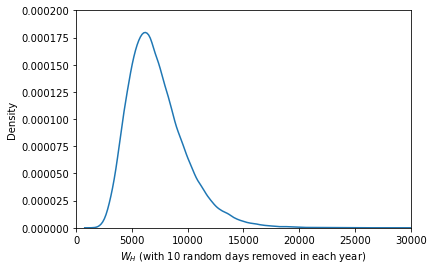

In [26]:
g = sns.kdeplot(Ws,clip=[0,30000])
x,f = g.lines[0].get_data()
plt.xlabel('$W_H$ (with 10 random days removed in each year)')
plt.ylabel('Density')
plt.xlim(0,30000)
plt.ylim(0,2e-4)
plt.show()